In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
print('Survived : ', data.Survived.unique())
print('Pclass   : ', data.Pclass.unique())
print('Gender   : ', data.Sex.unique())
print('Embarked : ', data.Embarked.dropna().unique())

Survived :  [0 1]
Pclass   :  [3 1 2]
Gender   :  ['male' 'female']
Embarked :  ['S' 'C' 'Q']


In [9]:
data.duplicated().sum()

0

In [10]:
mean_age = data.Age.mean()
data.Age.replace(np.nan, mean_age, inplace = True)
data.Age.isnull().sum()

0

In [11]:
mode_emb = data.Embarked.dropna().mode()[0]
data.Embarked.replace(np.nan, mode_emb, inplace = True)

data.Embarked.isnull().sum()

0

In [13]:
data.drop('Cabin', axis = 1, inplace = True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
data['family_members'] = data.SibSp + data.Parch
data.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [26]:
gender = data.Sex.value_counts()
gender

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

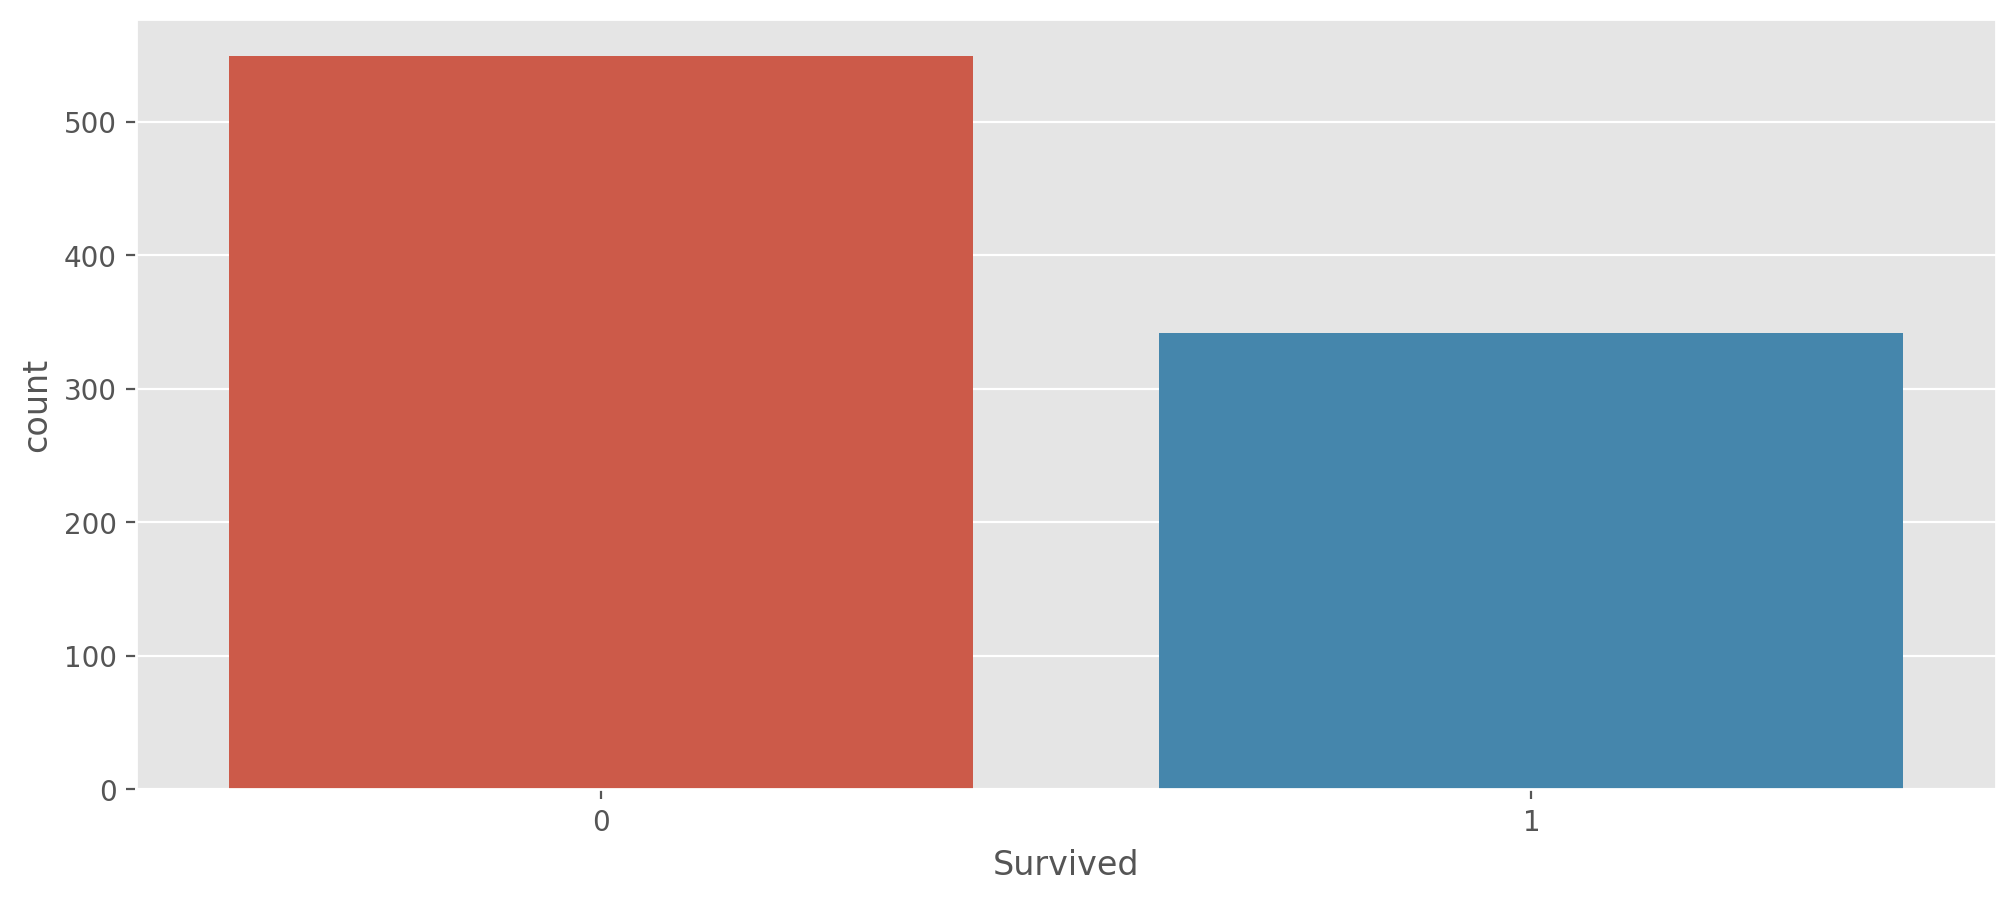

In [17]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot( data = data,x = 'Survived')

#### Most of passenger's dead in this disaster

<Axes: xlabel='Sex', ylabel='count'>

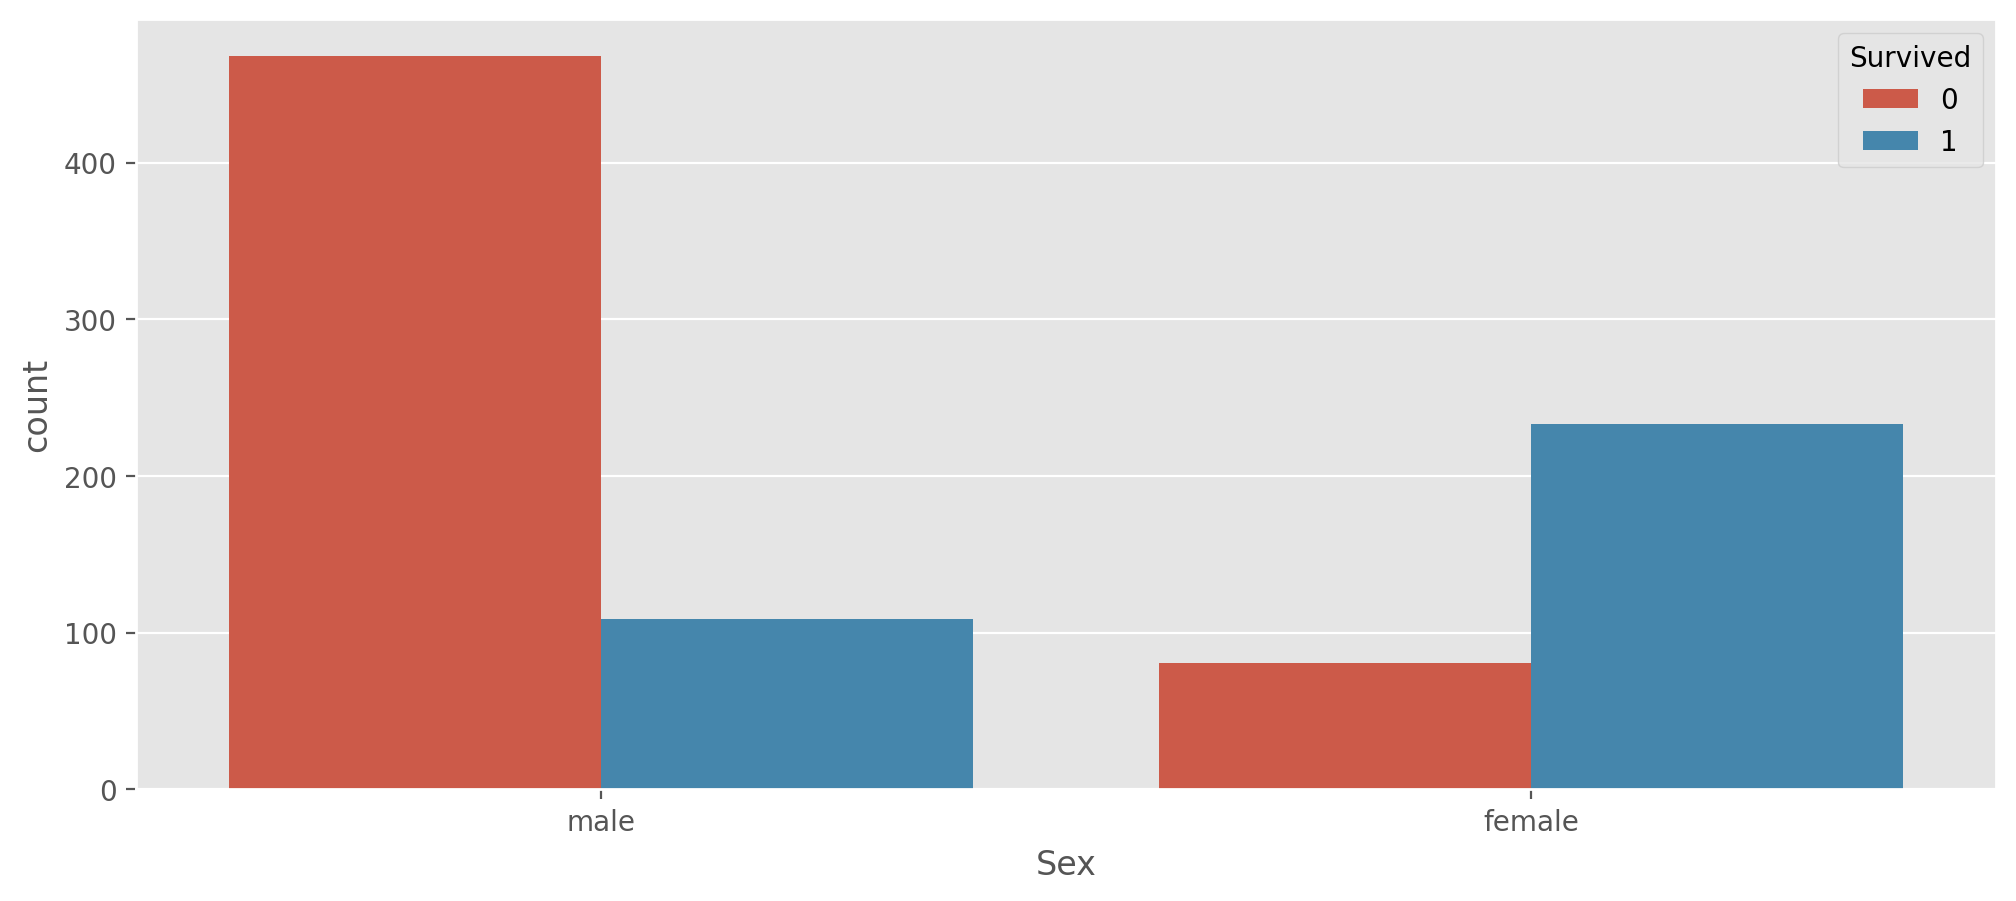

In [18]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x = 'Sex', hue = 'Survived', data = data)

#### Male's surviving rate is very low

In [20]:
data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [24]:
grp = data.groupby('Survived')['Sex'].value_counts()
grp

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

In [31]:
gender = data.Sex.value_counts()
gender_labels = ['Males', 'Females']

male = data.groupby('Sex').Survived.value_counts().sort_index()['male']
female = data.groupby('Sex').Survived.value_counts().sort_index()['female']
svl_labels = ['Dead', 'Survived']

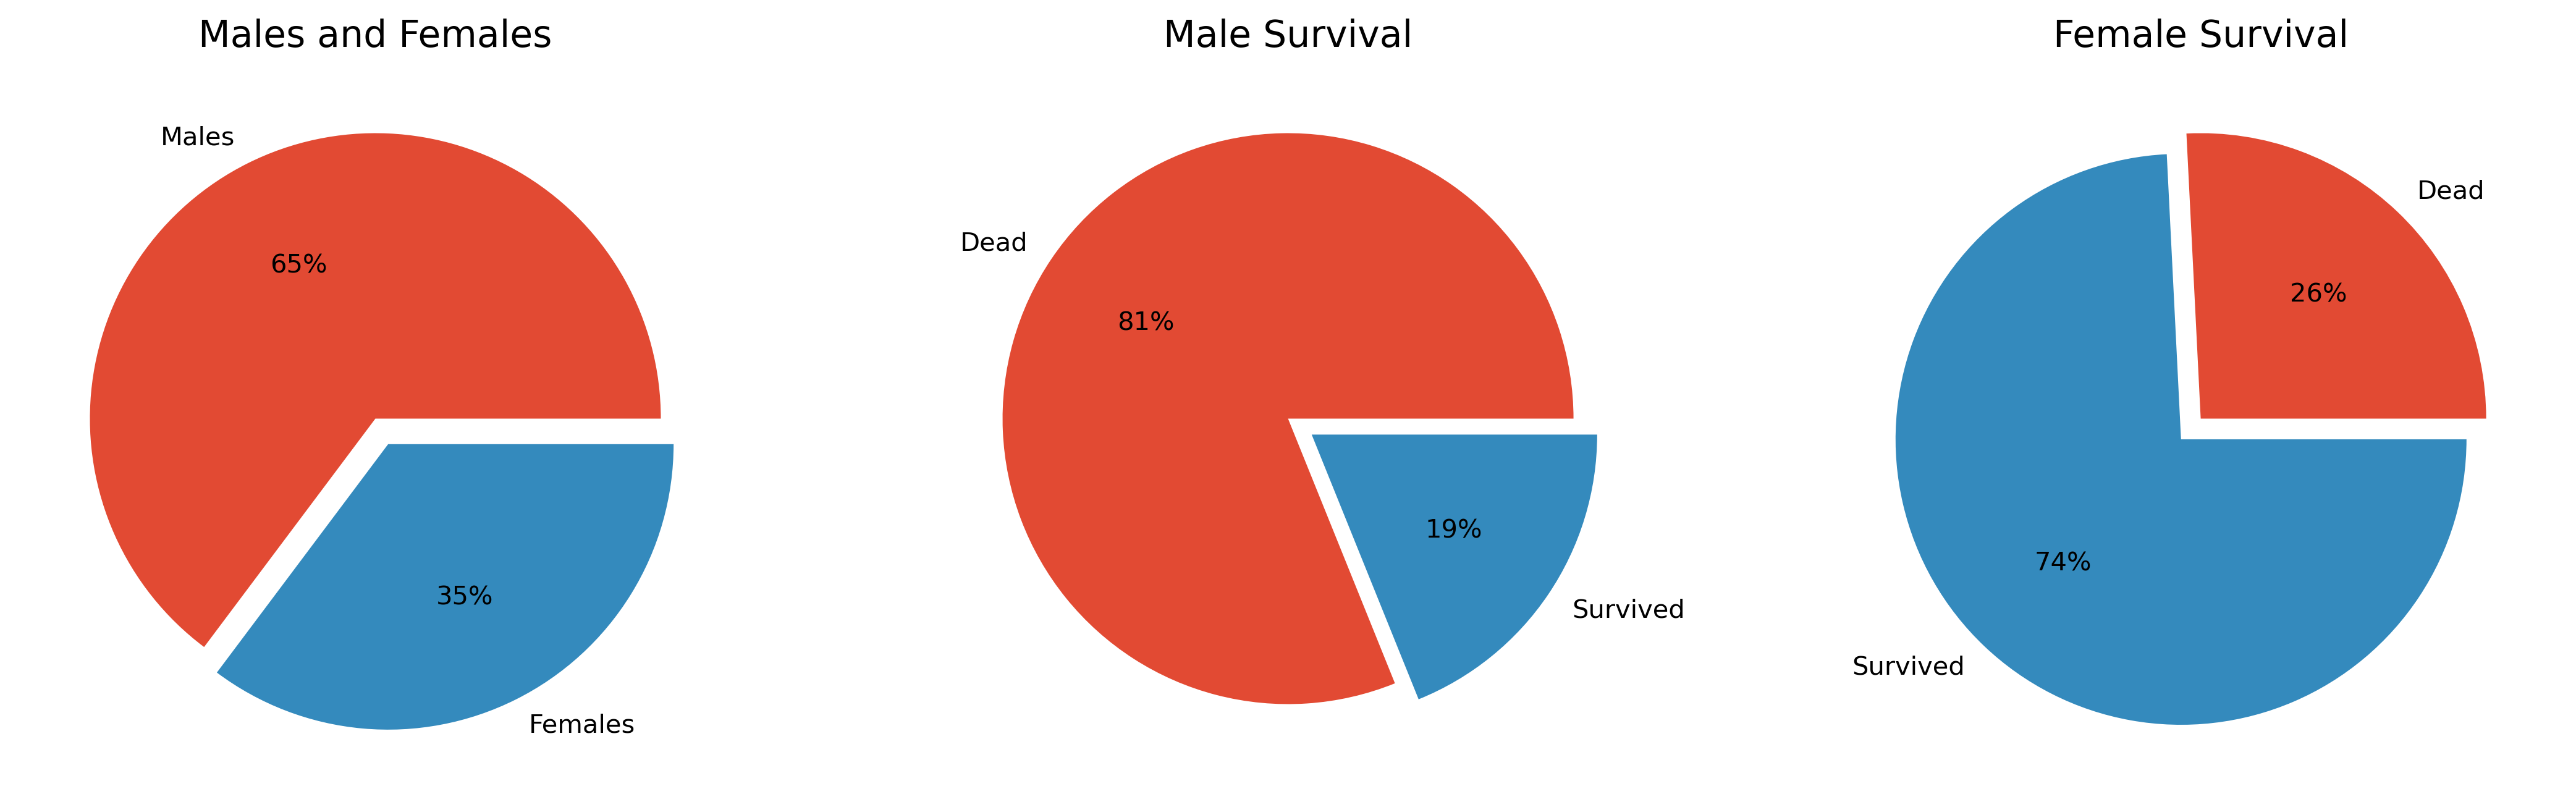

In [37]:
plt.figure(figsize = (18,5), dpi = 300)
plt.subplot(1,3,1)
plt.pie(gender, labels = gender_labels, autopct = '%1.f%%' , explode = [0,0.1])
plt.title('Males and Females')

plt.subplot(1,3,2)
plt.pie(male, labels = svl_labels, autopct = '%1.f%%', explode = [0,0.1])
plt.title('Male Survival')

plt.subplot(1,3,3)

plt.pie(female, labels = svl_labels, autopct = '%1.f%%', explode = [0,0.1])
plt.title('Female Survival')

plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

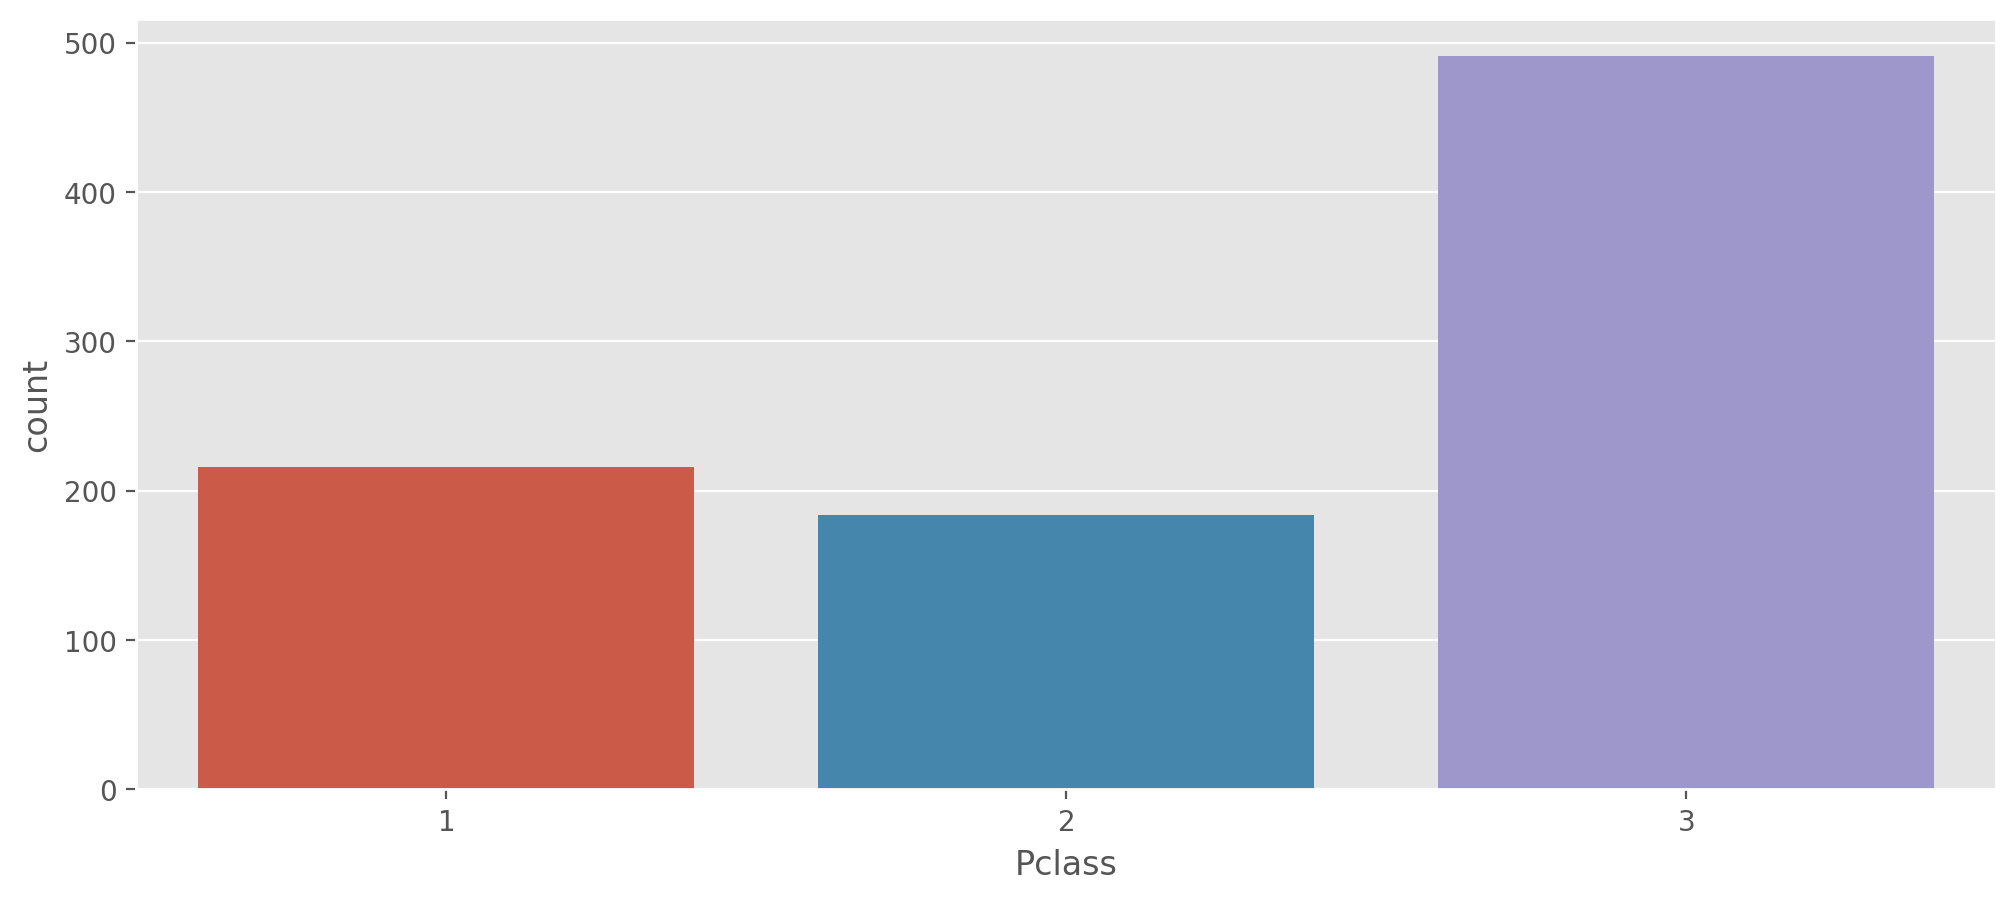

In [39]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot( x ='Pclass', data = data)

<Axes: xlabel='Pclass', ylabel='count'>

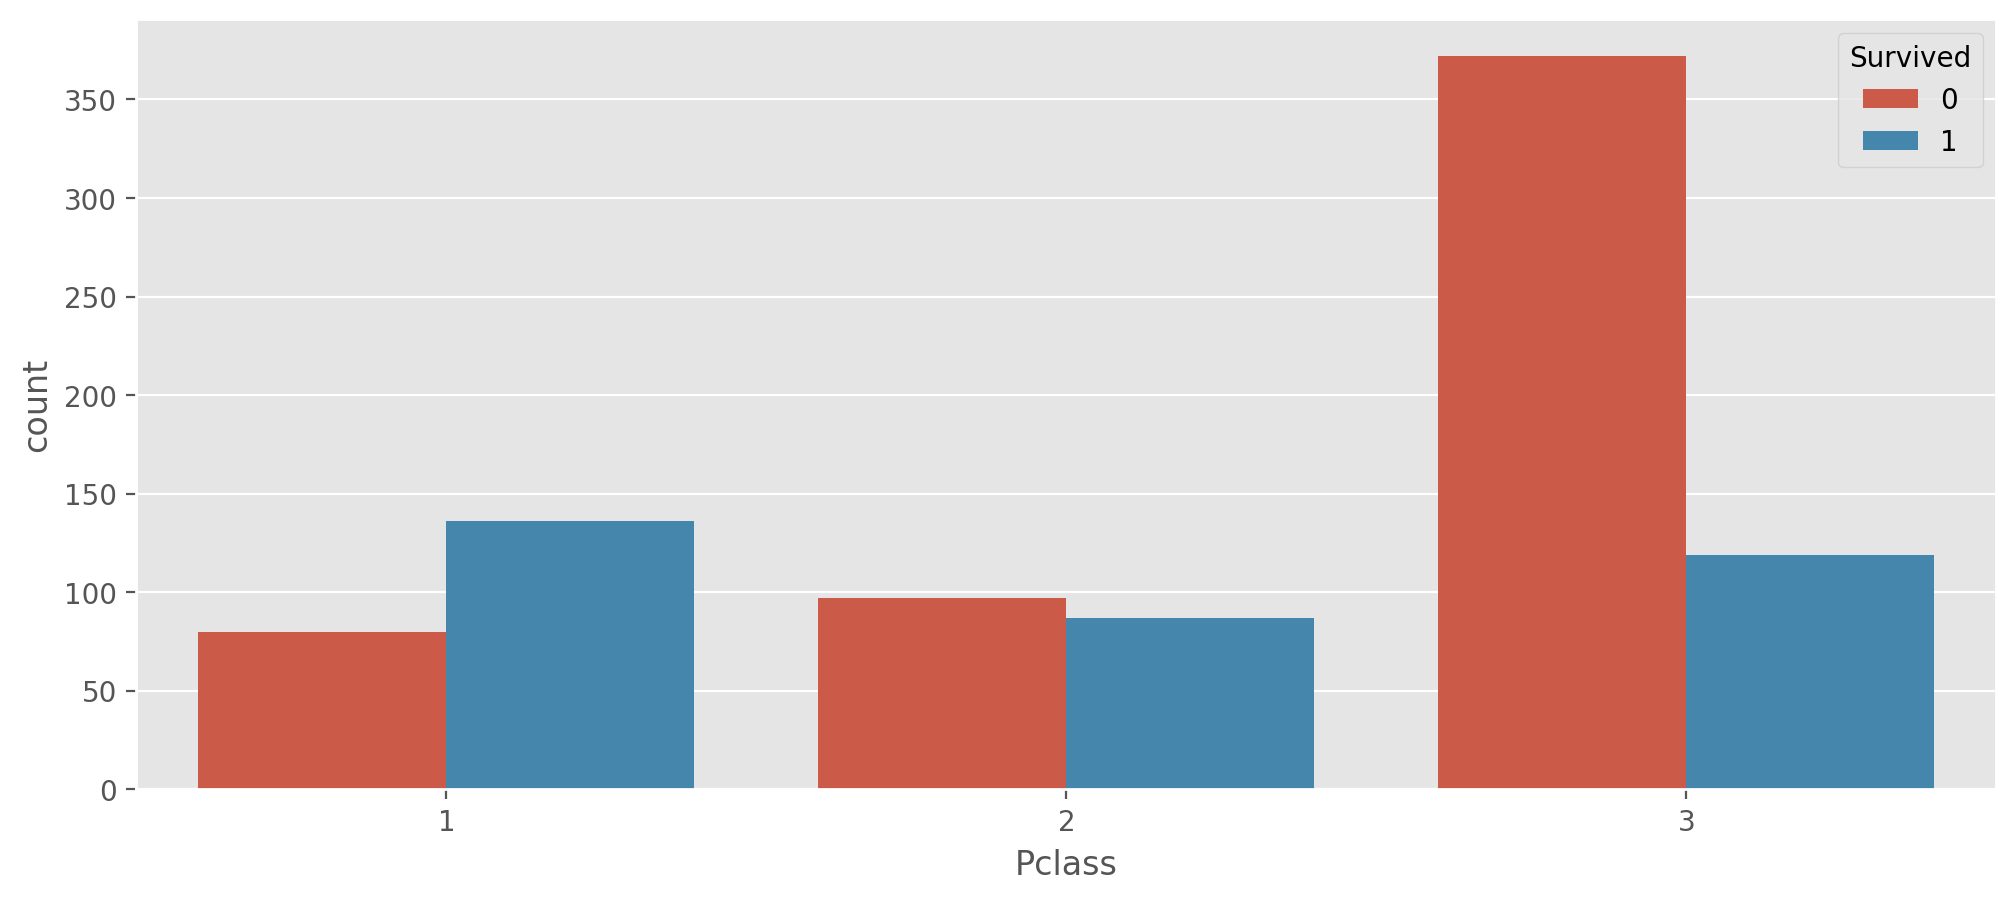

In [40]:
# Survival wrt passenger class
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x = 'Pclass', hue = 'Survived', data = data)

#### Most of the Passengers who travelled in 3rd class is dead

<Axes: xlabel='family_members', ylabel='count'>

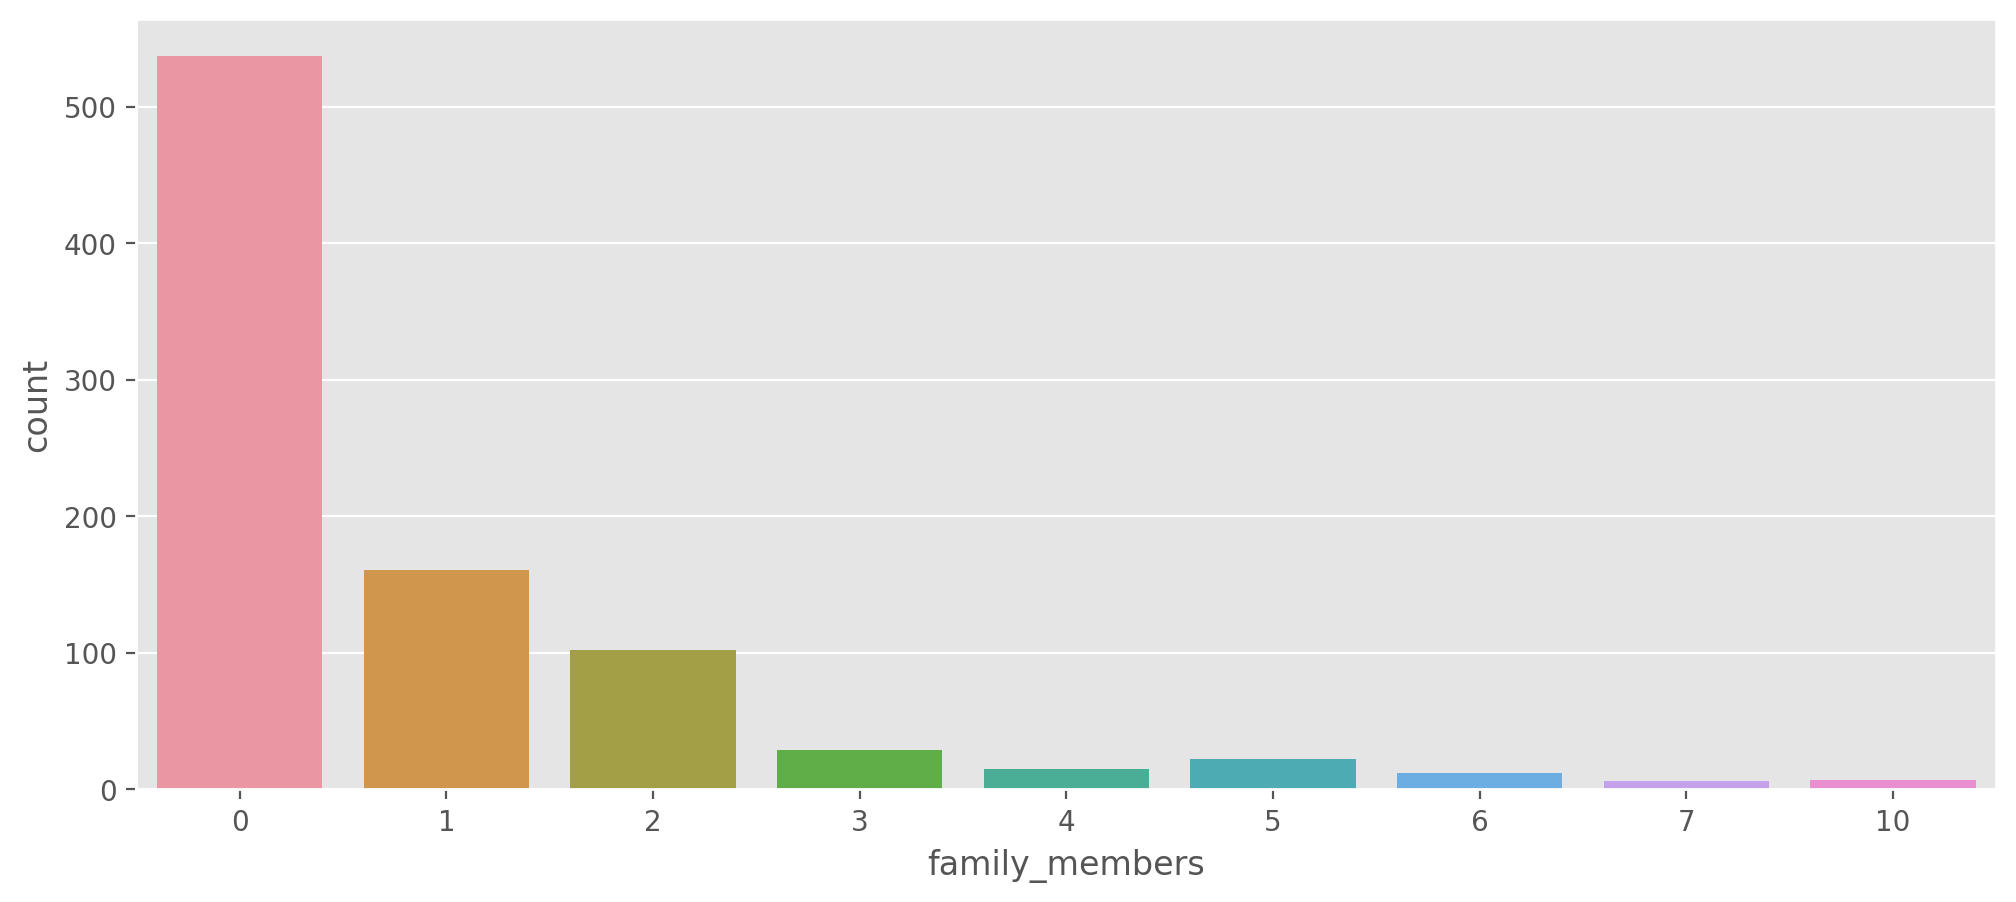

In [42]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x = 'family_members', data = data)

<Axes: xlabel='family_members', ylabel='count'>

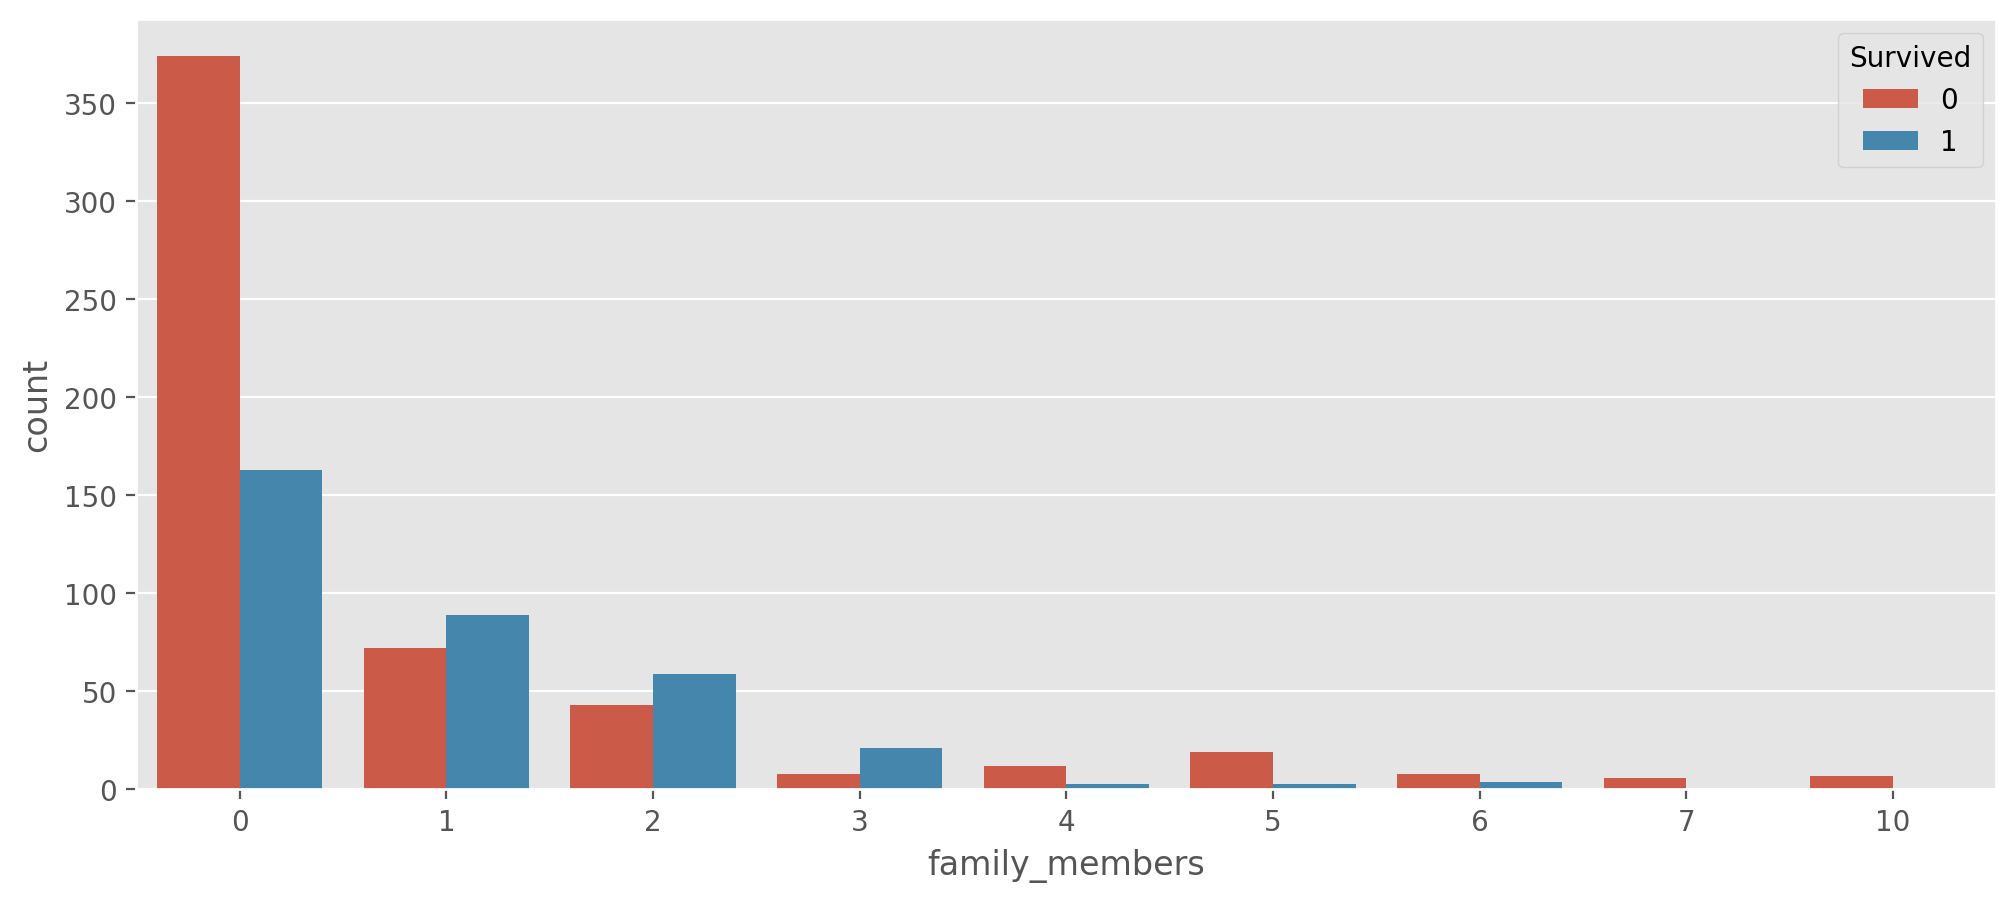

In [43]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x = 'family_members', hue = 'Survived', data = data)

<Axes: xlabel='Fare', ylabel='Density'>

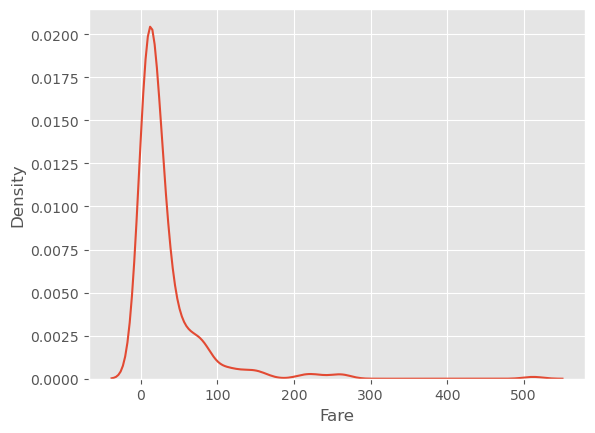

In [46]:
sns.distplot(data.Fare, hist = False)

<Axes: xlabel='Pclass', ylabel='Fare'>

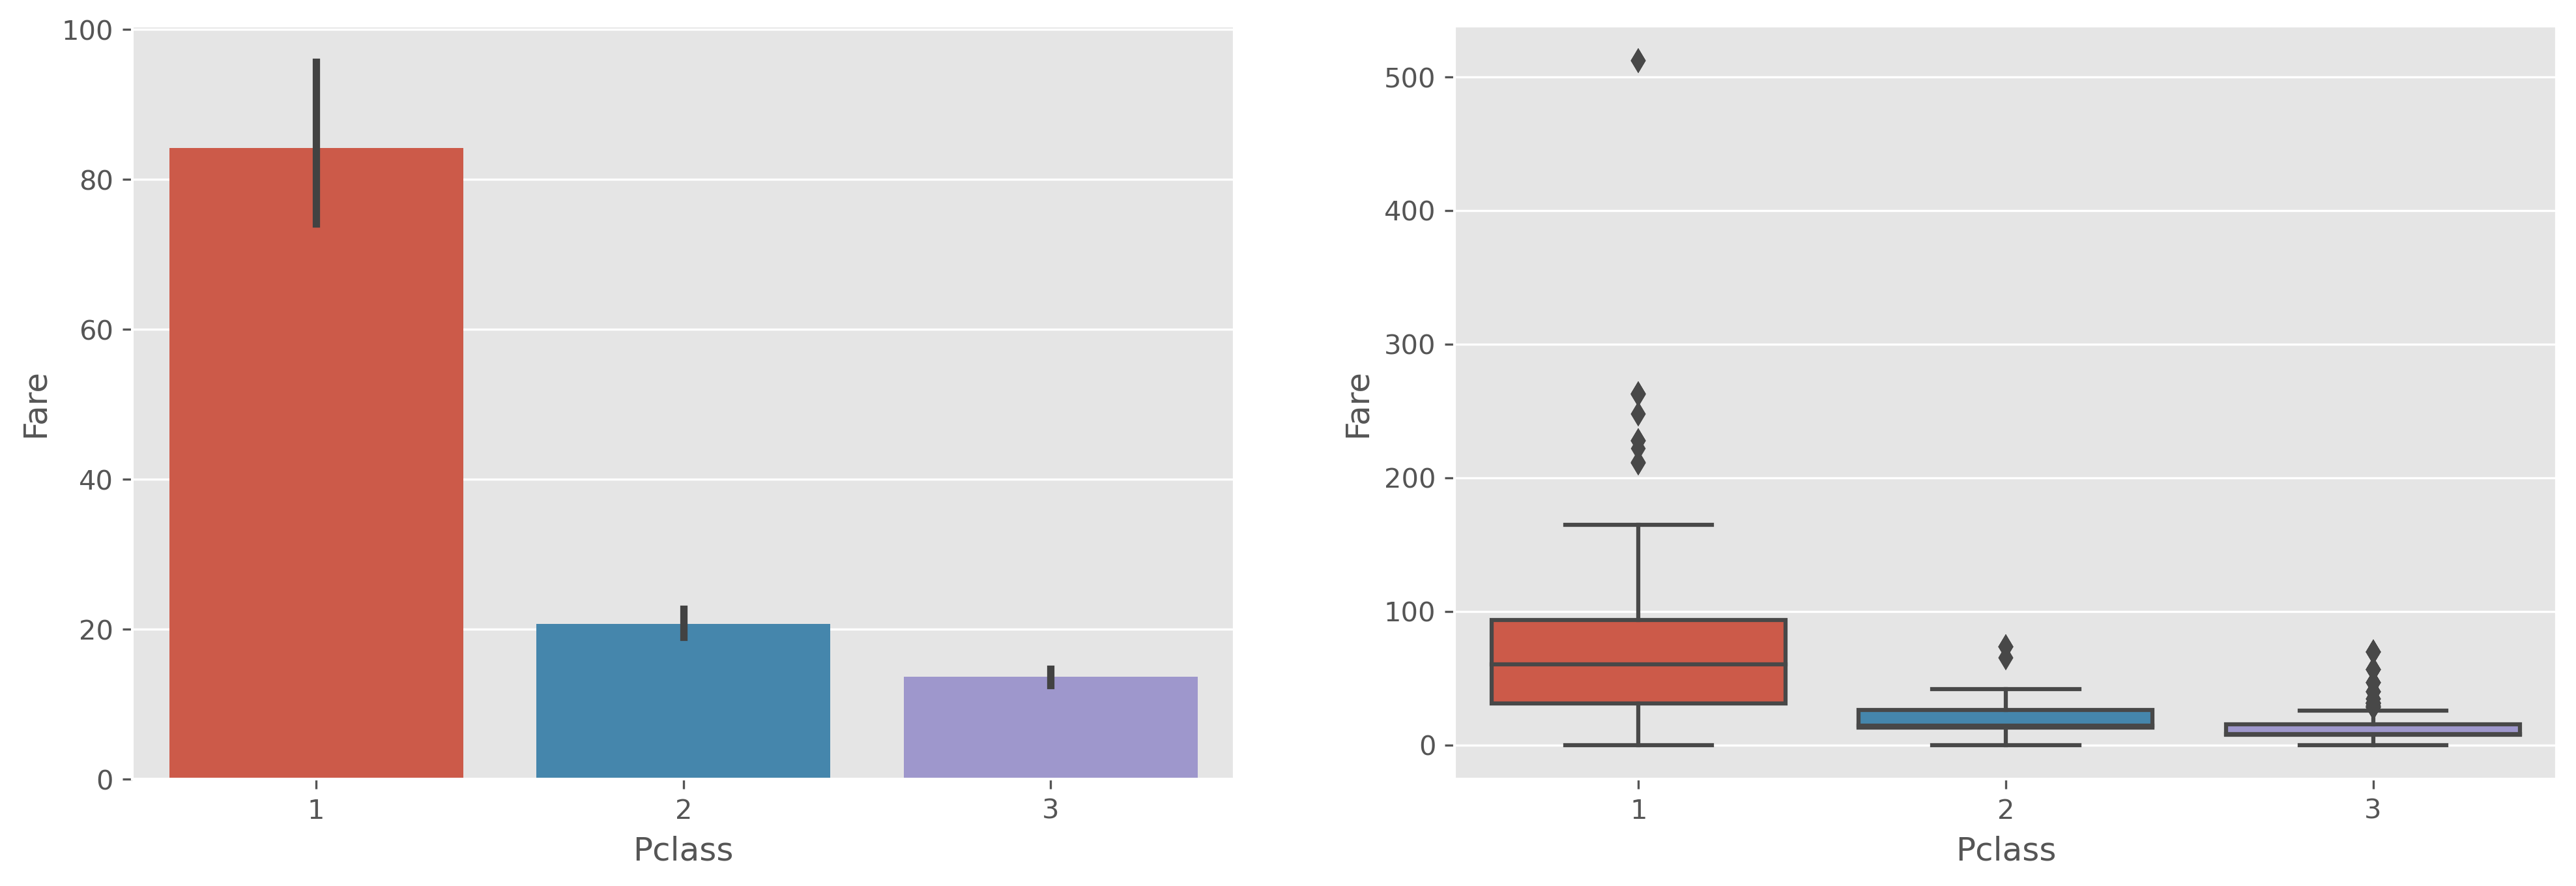

In [49]:
plt.figure(figsize = (16,5), dpi = 300)
plt.subplot(1,2,1)
sns.barplot(x = 'Pclass', y = 'Fare', data = data)
plt.subplot(1,2,2)
sns.boxplot(x = 'Pclass', y = 'Fare', data = data)

<Axes: xlabel='Survived', ylabel='Fare'>

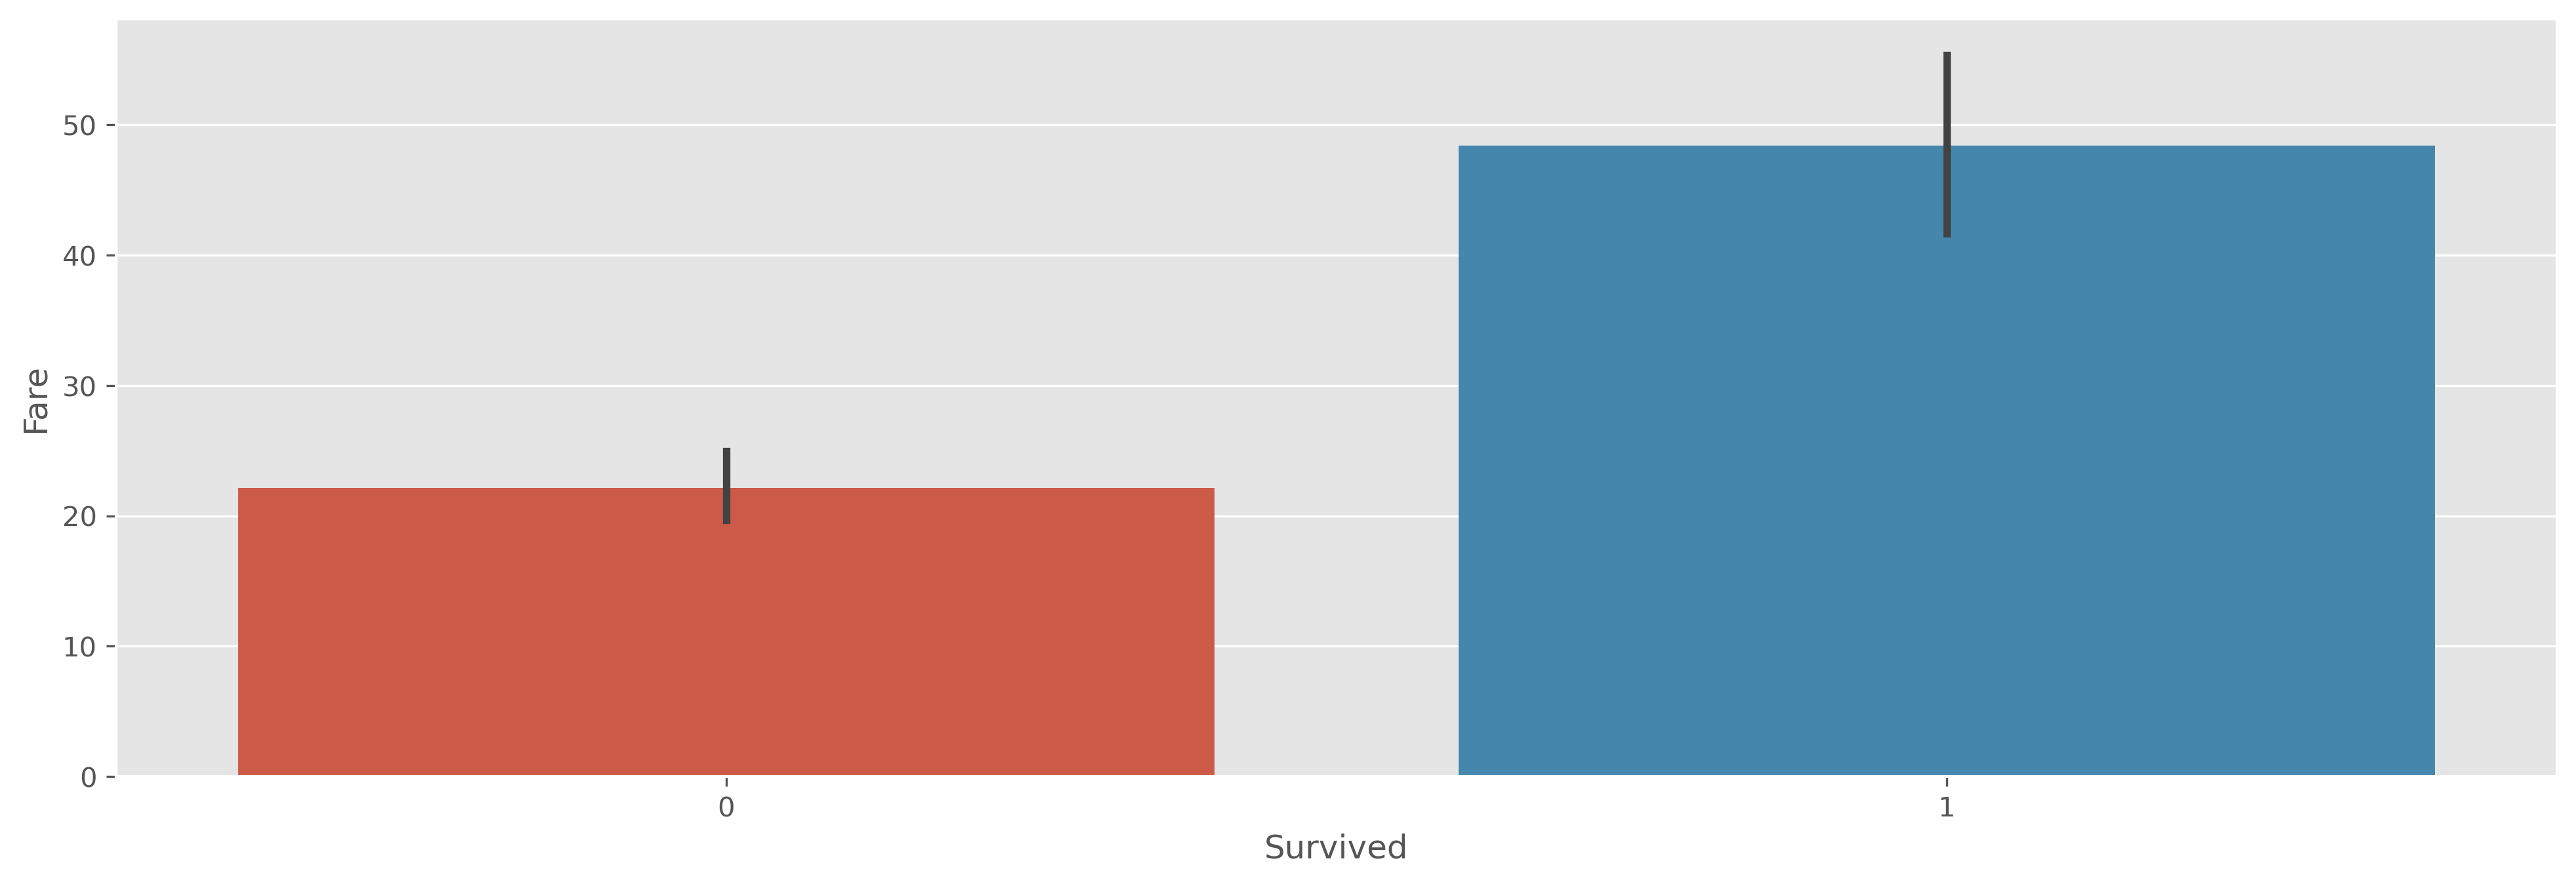

In [51]:
plt.figure(figsize = (16,5), dpi = 300)
sns.barplot(x = 'Survived', y = 'Fare', data = data)

#### High payers survives in this disaster

<Axes: ylabel='Age'>

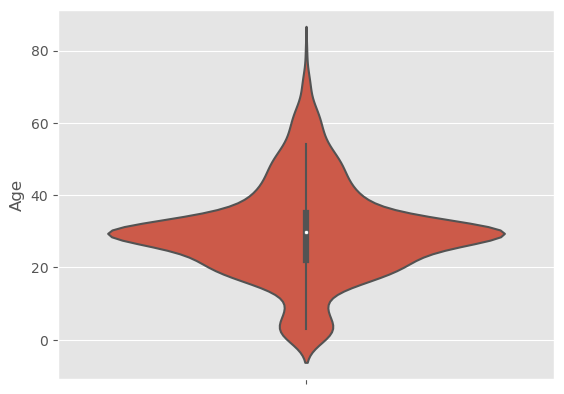

In [54]:
sns.violinplot(y = 'Age', data = data)

<Axes: xlabel='Survived', ylabel='Age'>

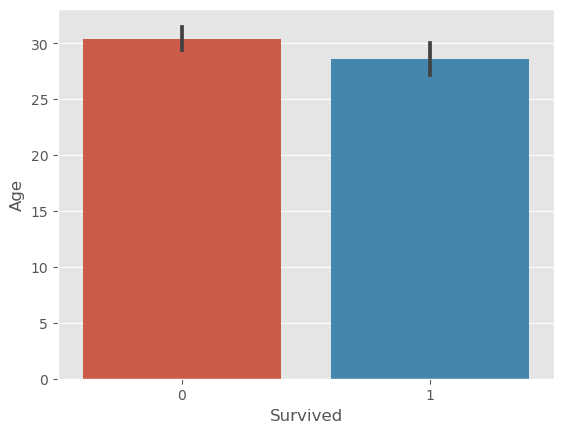

In [56]:
sns.barplot(x = 'Survived', y = 'Age', data = data)